<a href="https://colab.research.google.com/github/JSJeong-me/Uniinfo-Machine-Vision/blob/main/U0708/3-2-count_contour.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
from google.colab.patches import cv2_imshow

In [ ]:
src = cv2.imread('./antivirus.jpg', cv2.COLOR_BGR2RGB)

In [ ]:
cv2_imshow(src)

In [ ]:
import numpy as np

In [ ]:
low_red = np.array([0, 123, 0])

high_red = np.array([255, 255, 255])

In [ ]:
src_hsv = cv2.cvtColor(src, cv2.COLOR_BGR2HSV)

In [ ]:
mask = cv2.inRange(src_hsv, low_red, high_red)

In [ ]:
result_src = cv2.bitwise_and(src, src, mask = mask)

In [ ]:
cv2_imshow(result_src)

In [ ]:
_, image_thres = cv2.threshold(mask, 0, 255, cv2.THRESH_BINARY, cv2.THRESH_OTSU)

In [ ]:
cv2_imshow(image_thres)

In [ ]:
blur = cv2.medianBlur(image_thres, 13)

In [ ]:
cv2_imshow(blur)

In [ ]:
dist_transform = cv2.distanceTransform(blur, cv2.DIST_L2, 3)

In [ ]:
ret, isolate_image = cv2.threshold(dist_transform, 0.6*dist_transform.max(), 255, 0)

In [ ]:
cv2_imshow(isolate_image)

In [ ]:
last_image = np.uint8(isolate_image)

In [ ]:
cnt, _ = cv2.findContours(last_image.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

In [ ]:
print(len(cnt))

9


In [ ]:
for pts in cnt:
  cv2.arcLength(pts, True)
  cv2.drawContours(src, [pts], 0, (0, 255, 255), 5)

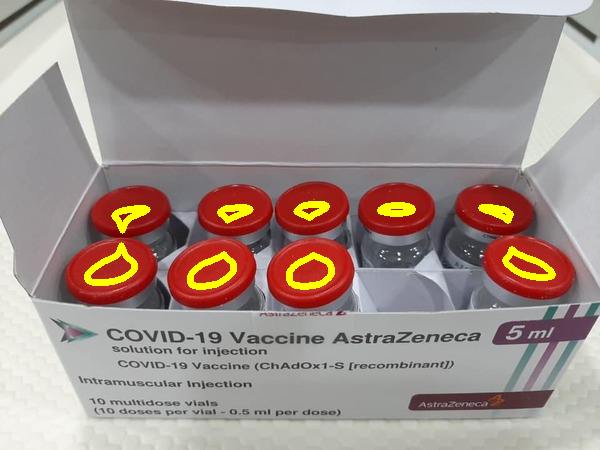

In [ ]:
cv2_imshow(src)

In [ ]:
for (i, c) in enumerate(cnt):
    ((x, y), _) = cv2.minEnclosingCircle(c)
    cv2.drawContours(src, [c], -1, (0, 255, 255), 5)
    cv2.putText(src, "{}".format(i + 1), (int(x)-55, int(y)+50), cv2.FONT_HERSHEY_SIMPLEX, 2, (255, 0, 0), 3)

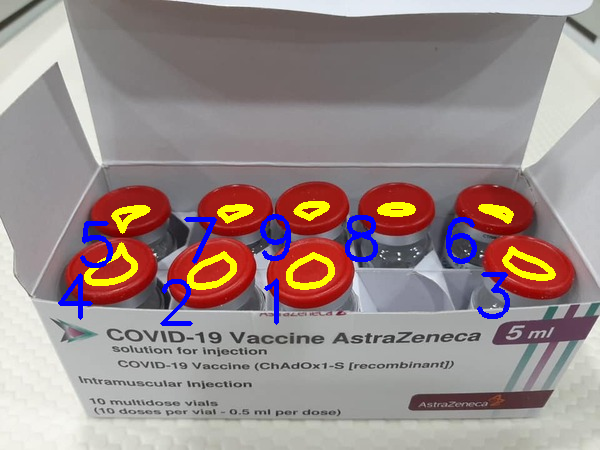

In [ ]:
cv2_imshow(src)